In [1]:
from dbn import DeepBeliefNet
from rbm import RestrictedBoltzmannMachine
from util import *
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error

sns.set_style('whitegrid')

### Load data

In [2]:
image_size = [28, 28]
train_images, train_labels, test_images, test_labels = read_mnist()

## Analysis

### 4.2.2 

Reconstruction losses for all RBMs in the stack

In [3]:
DBN = DeepBeliefNet(sizes={"vis": image_size[0] * image_size[1], "hid": 500, "pen": 500, "top": 2000, "lbl": 10},
                    image_size=image_size,
                    n_labels=10,
                    batch_size=20
                    )

DBN.train_greedylayerwise(train_images, train_labels, n_iterations=20)
DBN.rbm_stack

training vis--hid
learning CD1
iteration=      0 recon_loss=0.0648
iteration=      2 recon_loss=0.0470
iteration=      4 recon_loss=0.0413
iteration=      6 recon_loss=0.0382
iteration=      8 recon_loss=0.0363
iteration=     10 recon_loss=0.0348
iteration=     12 recon_loss=0.0339
iteration=     14 recon_loss=0.0332
iteration=     16 recon_loss=0.0327
iteration=     18 recon_loss=0.0321
training hid--pen
learning CD1
iteration=      0 recon_loss=0.2521
iteration=      2 recon_loss=0.2023
iteration=      4 recon_loss=0.1793
iteration=      6 recon_loss=0.1622
iteration=      8 recon_loss=0.1482
iteration=     10 recon_loss=0.1372
iteration=     12 recon_loss=0.1287
iteration=     14 recon_loss=0.1221
iteration=     16 recon_loss=0.1169
iteration=     18 recon_loss=0.1126
training pen+lbl--top
learning CD1
iteration=      0 recon_loss=0.2723
iteration=      2 recon_loss=0.1421
iteration=      4 recon_loss=0.0921
iteration=      6 recon_loss=0.0708
iteration=      8 recon_loss=0.0585
ite

{'vis--hid': <rbm.RestrictedBoltzmannMachine at 0x7fdcf3531490>,
 'hid--pen': <rbm.RestrictedBoltzmannMachine at 0x7fdcf3455100>,
 'pen+lbl--top': <rbm.RestrictedBoltzmannMachine at 0x7fdcf3455190>}

Plot reconstruction losses for all RBMs in the stack

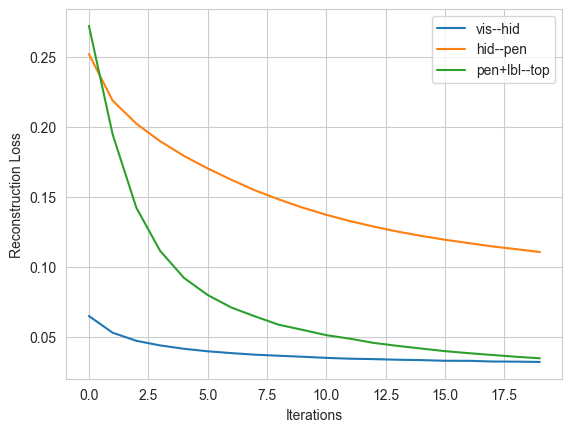

In [4]:
iterations = range(20)
plt.plot(iterations, DBN.rbm_stack['vis--hid'].losses, label='vis--hid')
plt.plot(iterations, DBN.rbm_stack['hid--pen'].losses, label='hid--pen')
plt.plot(iterations, DBN.rbm_stack['pen+lbl--top'].losses, label='pen+lbl--top')

plt.xlabel('Iterations')
plt.ylabel('Reconstruction Loss')
plt.legend()
plt.show()

### 4.2.2

Image recognition

In [5]:
DBN.recognize(test_images, test_labels)

AssertionError: 